# Fashion mnist implementation

## Import required libraries


In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from typing import Type
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import figure, pyplot as plt

## Load the dataset

In [2]:
mnist = fetch_openml("Fashion-MNIST", parser='auto')
x_data = mnist['data']
y_data = mnist['target']

## Exploring the dataset

In [3]:
# Make Visualizations better
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

### Features

In [4]:
x_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Labels

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [5]:
y_data.unique()

['9', '0', '3', '2', '7', '5', '1', '6', '4', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Dimensions

In [6]:
print("Features: ".ljust(15), x_data.shape)
print("Labels: ".ljust(15), y_data.shape)

Features:       (70000, 784)
Labels:         (70000,)


### Check if there has NaN values

In [7]:
x_data.isnull().any().sum()

0

## Visualizing the dataset

### Plot images randomly

In [8]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

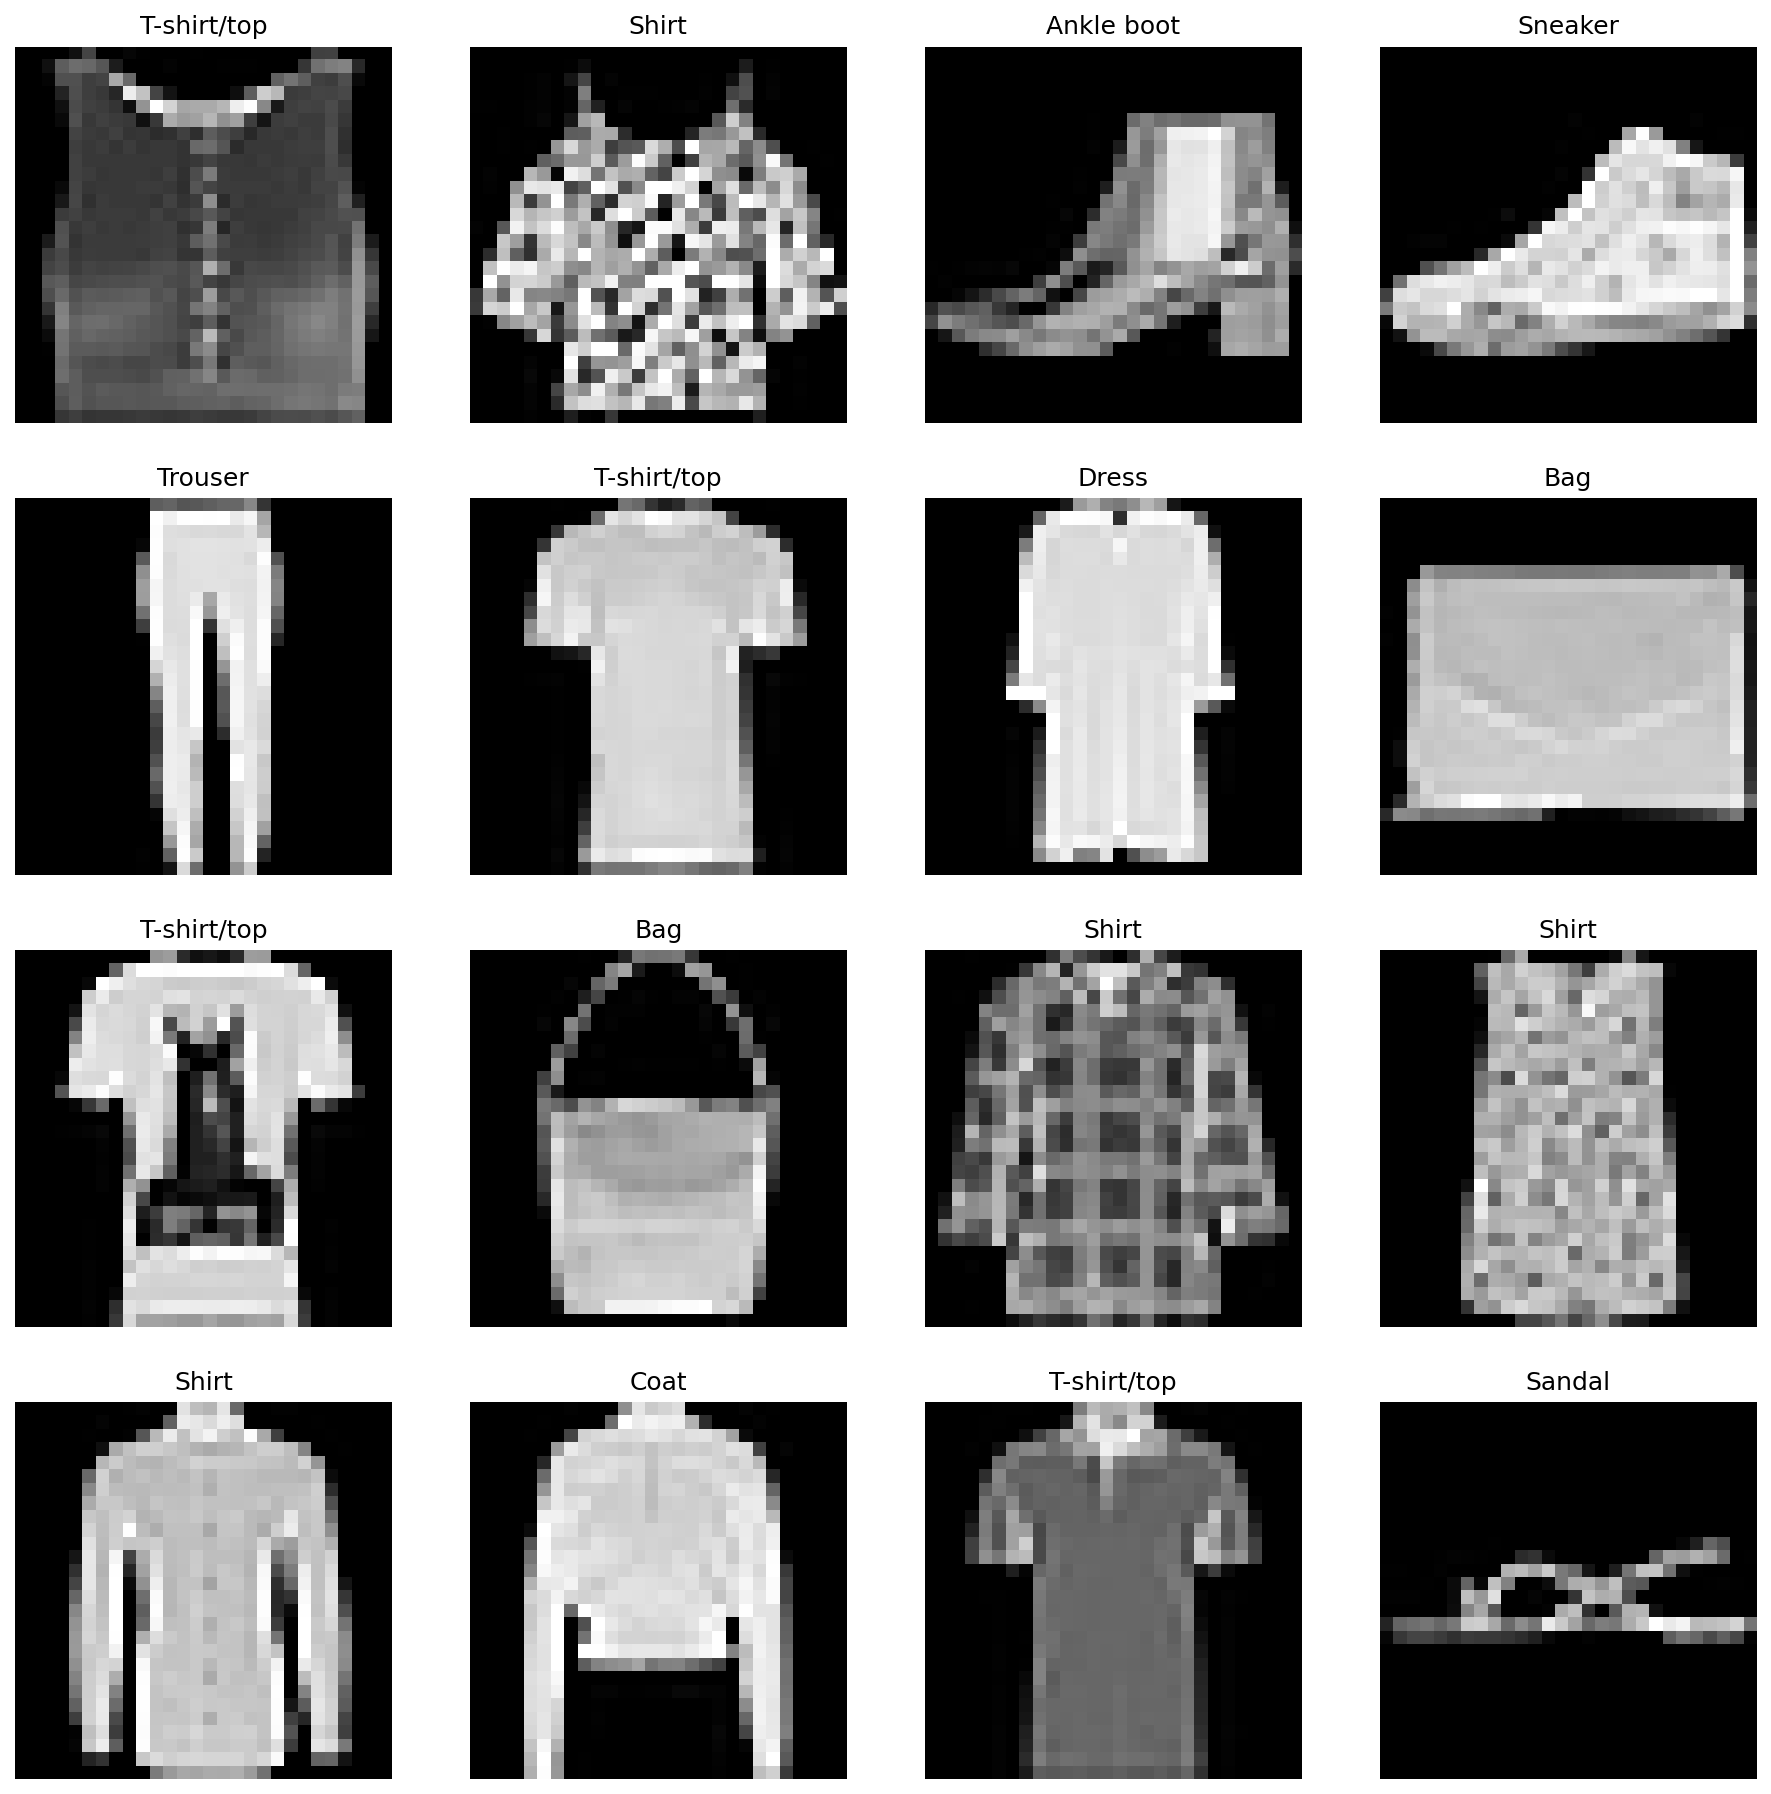

In [9]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(70000)
        img = x_data.values[index].reshape(28,28)
        cloths = y_data.astype('int')[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

### Distribution of labels

In [10]:
y_data.value_counts()

class
0    7000
1    7000
2    7000
3    7000
4    7000
5    7000
6    7000
7    7000
8    7000
9    7000
Name: count, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

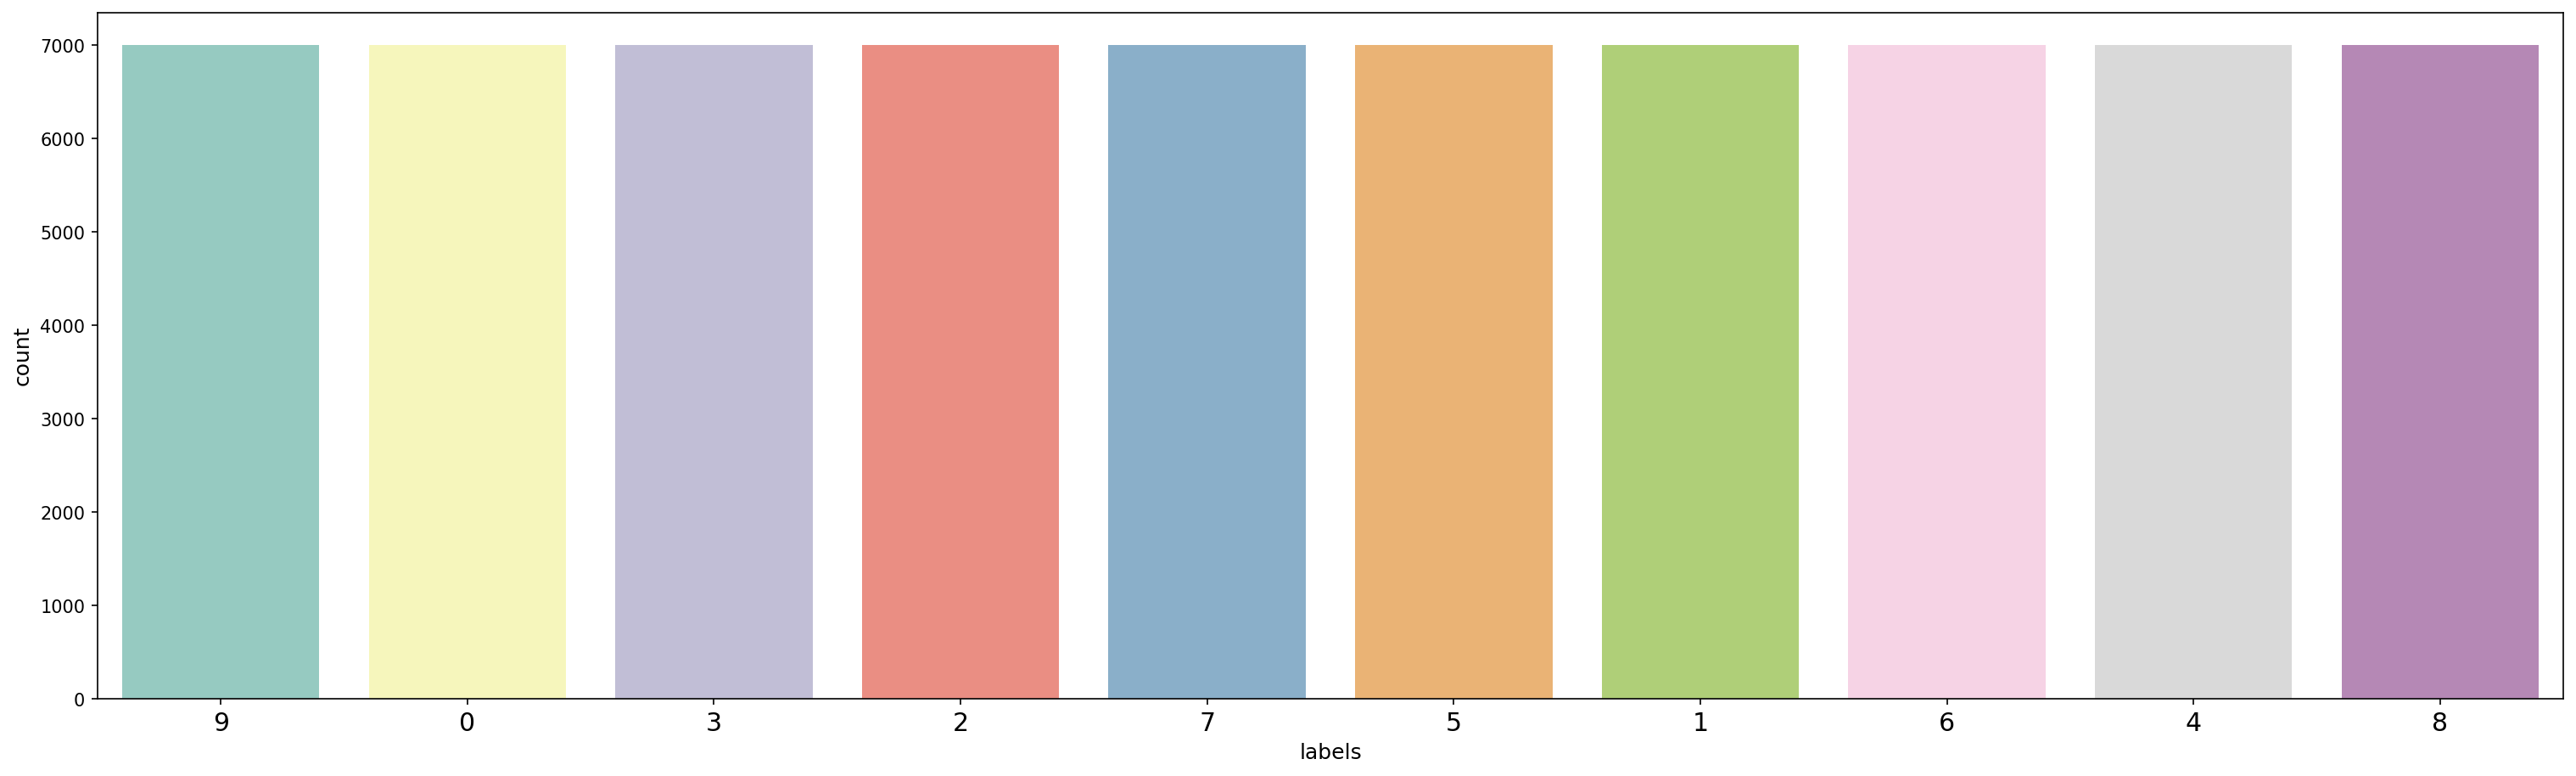

In [11]:
sns.countplot(data=pd.DataFrame(np.array(y_data), columns=['labels']), x='labels', palette='Set3')

## Data preprocessing


### Random seed

In [12]:
seed = 83
np.random.seed(seed)

### Convert to numpy array

In [13]:
x_data = np.array(x_data).astype('float32')
y_data = np.array(y_data)

### Normalization

In [14]:
x_data /= 255

### Dimensionality reduction

In [15]:
# Reference
# https://www.kaggle.com/code/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist

from sklearn.decomposition import PCA

pca = PCA(n_components=196)
x_data = pca.fit_transform(x_data)

print(x_data.shape)

(70000, 196)


In [16]:
# Reference
# https://www.kaggle.com/code/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist

def reconstruction(X, n, trans):
    """
    Creates a reconstruction of an input record, X, using the topmost (n) vectors from the
    given transformation (trans)

    Note 1: In this dataset each record is the set of pixels in the image (flattened to
    one row).
    Note 2: X should be normalized before input.
    """
    vectors = [trans.components_[n] * X[n] for n in range(0, n)]

    # Invert the PCA transformation.
    ret = trans.inverse_transform(X)

    # This process results in non-normal noise on the margins of the data.
    # We clip the results to fit in the [0, 1] interval.
    ret[ret < 0] = 0
    ret[ret > 1] = 1
    return ret

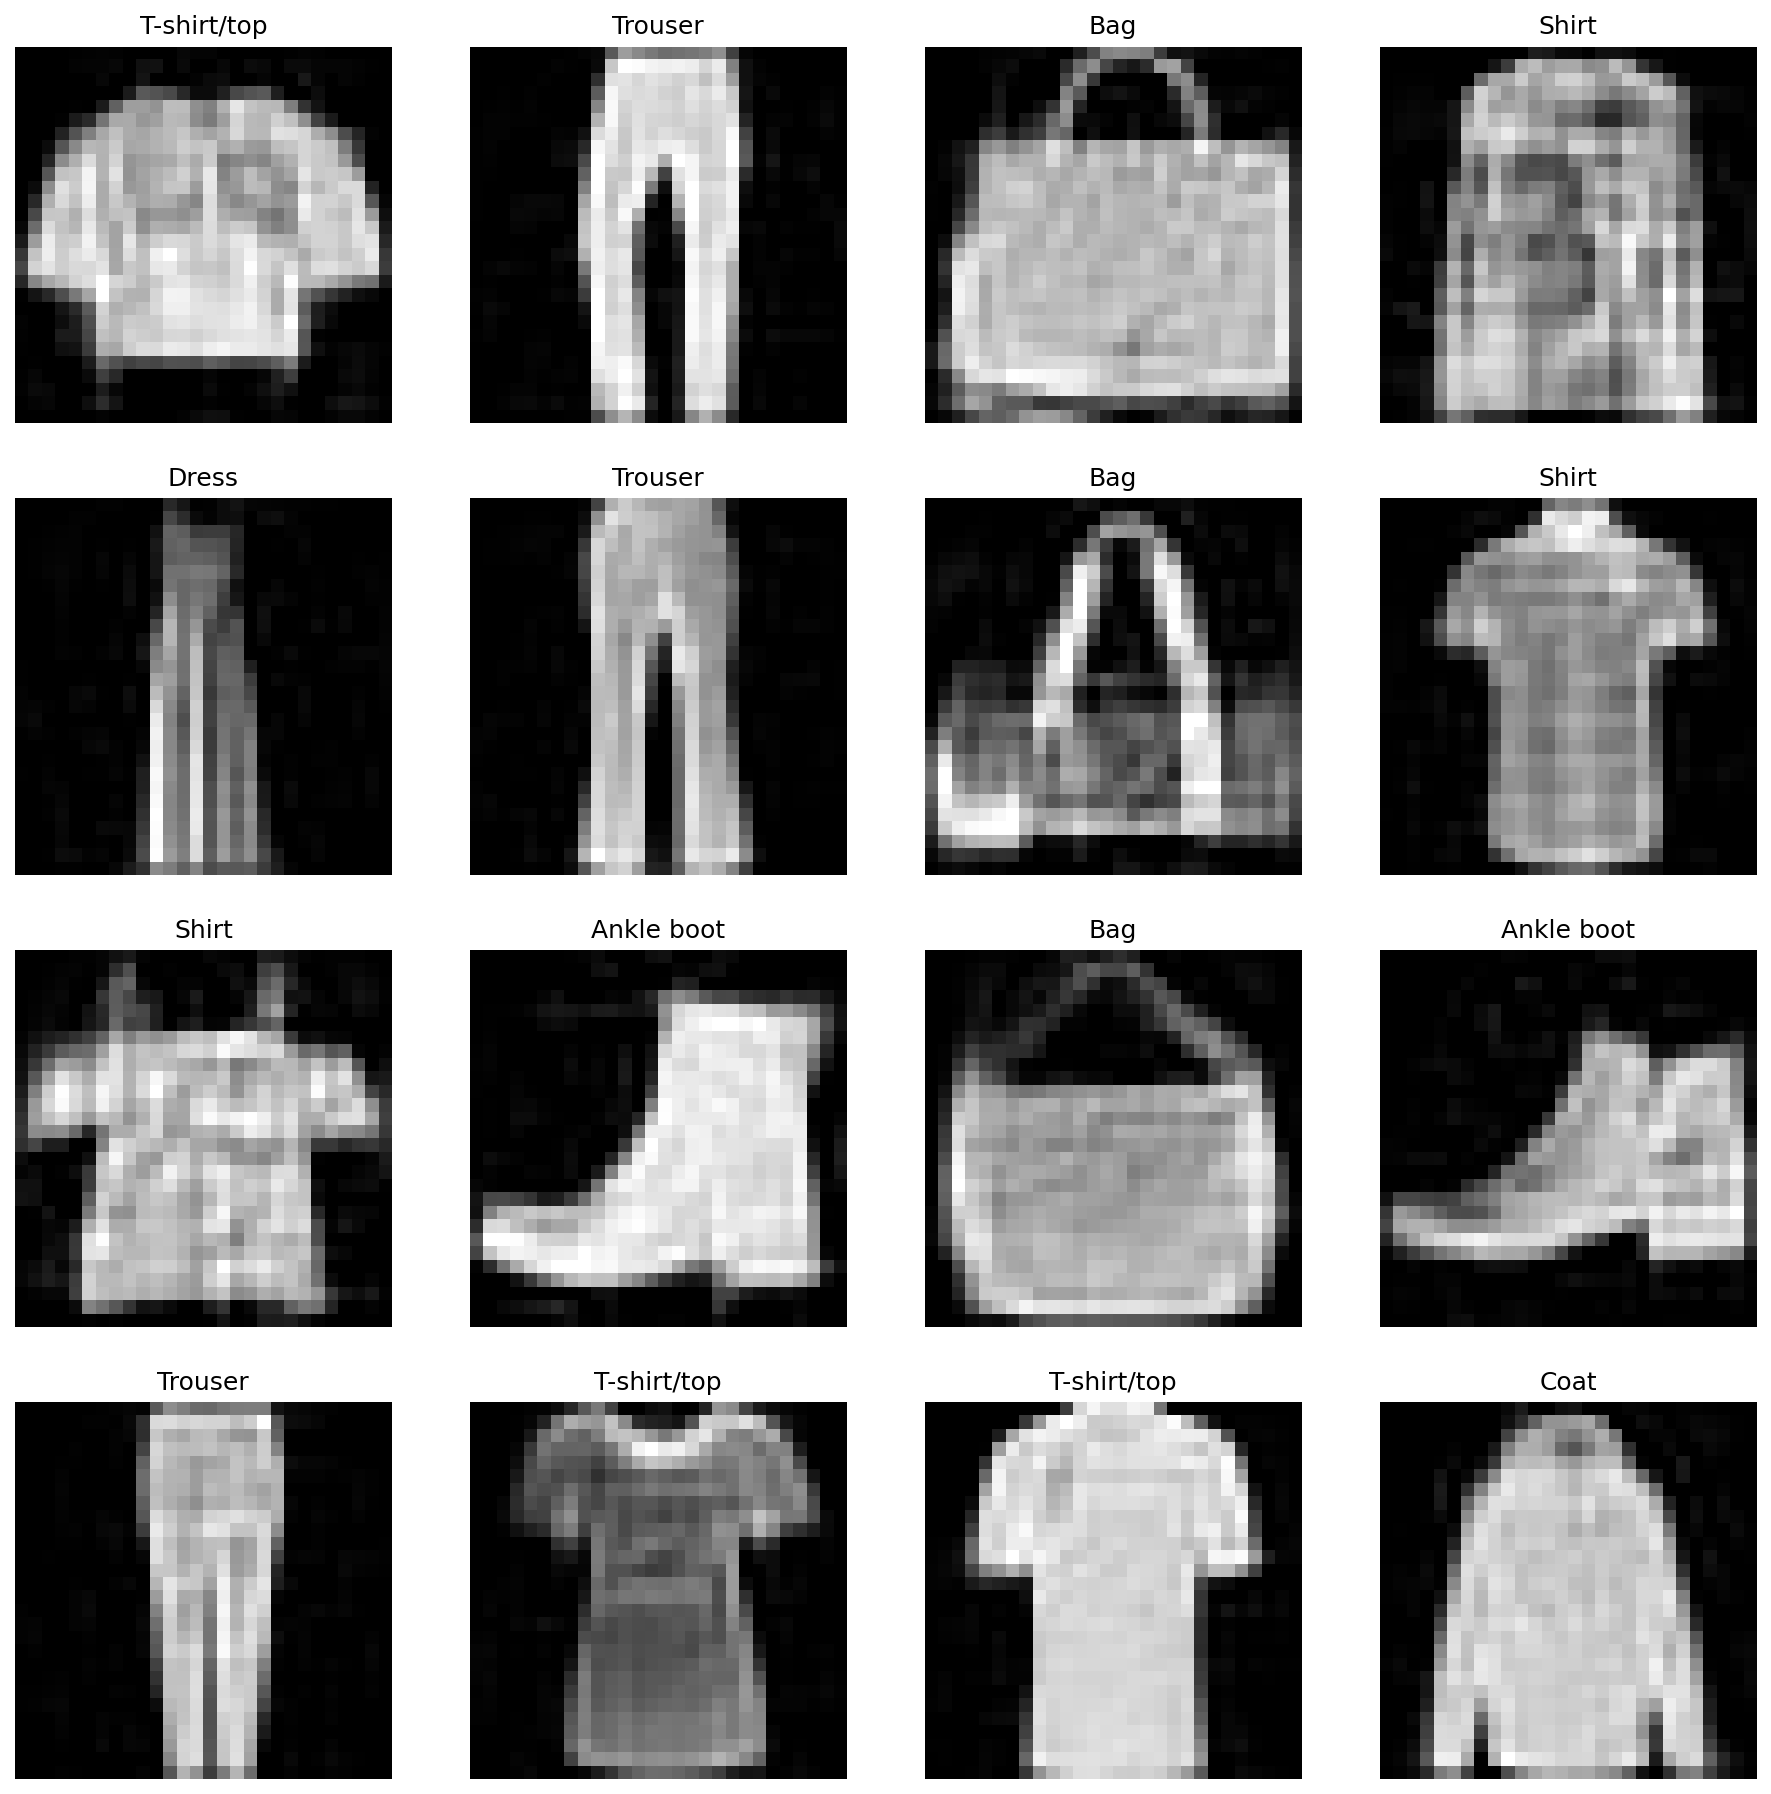

In [17]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(70000)
        img = reconstruction(x_data[index, :], 196, pca).reshape((28, 28))
        cloths = y_data.astype('int')[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

### Split data into training, validation and testing set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=seed, test_size=1/7)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, random_state=seed, test_size=1/6)

x_train = np.array(x_train)
x_validation = np.array(x_validation)
x_test = np.array(x_test)

print("".ljust(20) + "X size\ty size")
print("training size:".ljust(20) + "{0}\t{1}".format(len(x_train), len(y_train)))
print("validation size:".ljust(20) + "{0}\t{1}".format(len(x_validation), len(y_validation)))
print("test size:".ljust(20) + "{0}\t{1}".format(len(x_test), len(y_test)))

                    X size	y size
training size:      50000	50000
validation size:    10000	10000
test size:          10000	10000


### Data augmentation

In [19]:
from keras.preprocessing.image import  ImageDataGenerator

# Reference
# https://github.com/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/1.0-image-augmentation.ipynb

x_train = x_train.reshape((-1, 14, 14, 1))

image_data_generator = ImageDataGenerator(
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
)
image_data_generator.fit(x_train)

print(x_train.shape)

steps_per_epoch = 1000
epoch = 1
count = 0

for x_batch, y_batch in image_data_generator.flow(x_train, y_train, batch_size=32, seed=seed):
    x_train = np.append(x_train, x_batch, axis=0)
    y_train = np.append(y_train, y_batch, axis=0)

    if count > steps_per_epoch * epoch:
        break

    count += 1

print(x_train.shape)

x_train = x_train.reshape((-1, 196))

(50000, 14, 14, 1)
(82064, 14, 14, 1)


In [20]:
# for final evaluation
# ! append validataion set into training set
# x_train = np.append(x_train, x_validation, axis=0)
# y_train = np.append(y_train, y_validation, axis=0)

### Shuffle

Prevent overfitting

In [21]:
index = np.arange(x_train.shape[0])
np.random.shuffle(index)

x_train = x_train[index]
y_train = y_train[index]

## Train the model


### Preparing model

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# base model
# svc = SVC(probability=True, random_state=seed)
# random_forest = RandomForestClassifier(n_estimators=64, random_state=seed, n_jobs=-1)
# knn = KNeighborsClassifier(n_jobs=-1)
# extra_tree = ExtraTreesClassifier(random_state=seed, n_jobs=-1)

# tuned model
# {'knn__algorithm': 'kd_tree', 'knn__n_neighbors': 10, 'random_forest__max_features': 6, 'random_forest__n_estimators': 81, 'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
svc = SVC(probability=True, random_state=seed, kernel='rbf', C=1000, gamma=0.001)
random_forest = RandomForestClassifier(n_estimators=81, random_state=seed, n_jobs=-1, max_features=6)
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=10, algorithm='ball_tree')
extra_tree = ExtraTreesClassifier(random_state=seed, n_jobs=-1, max_features=6, n_estimators=81)

estimators = [
  ('svc', svc),
  ('random_forest', random_forest),
  ('knn', knn),
  ('extra_tree', extra_tree)
]

soft_voting_ensemble = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1, verbose=True)
hard_voting_ensemble = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1, verbose=True)

### Hyperparameter tuning

In [23]:
# References
# https://stackoverflow.com/questions/46580199/hyperparameter-in-voting-classifier
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

# from sklearn.model_selection import GridSearchCV


# param = {
#   # https://zhuanlan.zhihu.com/p/86844493
#   "svc__kernel": ["rbf"],
#   "svc__gamma": [0.0001, 0.001, 0.01, 0.1, 1.0],
#   "svc__C": [1, 10, 100, 1000, 10000],
#   # "svc__degree": [0, 1, 2, 3, 4, 5, 6],

#   # https://zhuanlan.zhihu.com/p/143092725
#   "knn__n_neighbors": [10],
#   "knn__algorithm": ['kd_tree'],
#   # "knn__p": [1, 2, 3, 4, 5],

#   # https://zhuanlan.zhihu.com/p/56940098
#   "random_forest__n_estimators": [81],
#   # "random_forest__max_depth": np.linspace(1, 32, 32, endpoint=True),
#   # "random_forest__min_samples_split": np.linspace(0.1, 1.0, 10, endpoint=True),
#   # "random_forest__min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True),
#   "random_forest__max_features": [6],
# }

# grid = GridSearchCV(soft_voting_ensemble, param, cv=5, scoring='accuracy', n_jobs=-1)
# grid.fit(x_train, y_train)

### Training

In [24]:
# svc.fit(x_train, y_train)
# random_forest.fit(x_train, y_train)
# knn.fit(x_train, y_train)
# extra_tree.fit(x_train, y_train)

# hard_voting_ensemble.fit(x_train, y_train)

# 19m
soft_voting_ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(C=1000, gamma=0.001, probability=True,
                                  random_state=83)),
                             ('random_forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=83)),
                             ('knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   n_jobs=-1, n_neighbors=10)),
                             ('extra_tree',
                              ExtraTreesClassifier(n_jobs=-1,
                                                   random_state=83))],
                 n_jobs=-1, verbose=True, voting='soft')

#### Score comparison on validation set


In [25]:
soft_voting_ensemble_validation_score = soft_voting_ensemble.score(x_validation, y_validation)
# svc_validation_score = svc.score(x_validation, y_validation)
# random_forest_validation_score = random_forest.score(x_validation, y_validation)
# knn_validation_score = knn.score(x_validation, y_validation)
# extra_tree_validation_score = extra_tree.score(x_validation, y_validation)

In [26]:
print("Soft voting ensemble score:".ljust(40) + "{0}".format(soft_voting_ensemble_validation_score))
# print("SVC score:".ljust(40) + "{0}".format(svc_validation_score))
# print("Random forest score:".ljust(40) + "{0}".format(random_forest_validation_score))
# print("KNN score:".ljust(40) + "{0}".format(knn_validation_score))
# print("Extra tree score:".ljust(40) + "{0}".format(extra_tree_validation_score))

Soft voting ensemble score:             0.8998


#### Score comparison on test set


In [27]:
# soft_voting_ensemble_test_score = soft_voting_ensemble.score(x_test, y_test)
# hard_voting_ensemble_test_score = hard_voting_ensemble.score(x_test, y_test)
# svc_test_score = svc.score(x_test, y_test)
# random_forest_test_score = random_forest.score(x_test, y_test)
# knn_test_score = knn.score(x_test, y_test)
# extra_tree_test_score = extra_tree.score(x_test, y_test)

In [28]:
# print("Soft voting ensemble score:".ljust(40) + "{0}".format(soft_voting_ensemble_test_score))
# print("hard voting ensemble score:".ljust(40) + "{0}".format(hard_voting_ensemble_test_score))
# print("SVC score:".ljust(40) + "{0}".format(svc_test_score))
# print("Random forest score:".ljust(40) + "{0}".format(random_forest_test_score))
# print("KNN score:".ljust(40) + "{0}".format(knn_test_score))
# print("Extra tree score:".ljust(40) + "{0}".format(extra_tree_test_score))

## Evaluation the model

### Load saved ensemble model

In [29]:
# import joblib
# soft_validation = joblib.load('./model/soft_voting_ensemble_validation.pkl')

### Learning curve

In [30]:
# Reference
# https://blog.csdn.net/gracejpw/article/details/102370364

# from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# common_params = {
#     "X": x_train,
#     "y": y_train,
#     "train_sizes": np.linspace(0.1, 1.0, 5),
#     "cv": ShuffleSplit(n_splits=3, test_size=0.2, random_state=seed),
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
#     "random_state": seed
# }

# LearningCurveDisplay.from_estimator(soft_voting_ensemble, **common_params)
# plt.legend(["Training Score", "Test Score"])
# plt.title(f"Learning Curve for {soft_voting_ensemble.__class__.__name__}")

## Confusion matrix

## Visualization of predicted labels

## Classification report

## Predicting on the test set